# Convolutional Neural Networks
In this notebook we will work with convolutional neural networks for classification

## Exercise 1 (Load the data set)
Import the digits data set (MNIST) and visualize 10 instances of each digit. Prepare the data set so that each digit is a tensor of size $28 \times 28 \times 1$. The last component represent the number of channels. If the pictures would have colors then there would be 3 channels.

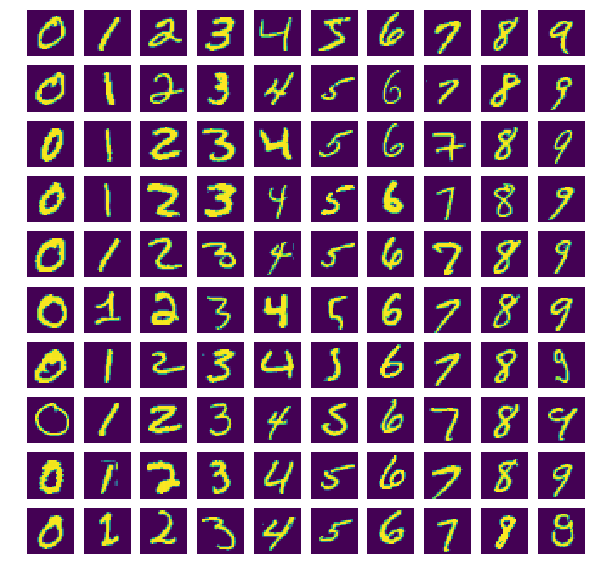

In [32]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(10,10))
for j in range(10):
    for i in range(10):
        digit = x_train[y_train==i][j]
        plt.subplot(10, 10, 10*j+i+1)
        plt.imshow(digit)
        plt.axis('off')

        
# using the full data set will take a lot of time so we are only going to se a subset
x_train = x_train[:5000,:,:]
y_train = y_train[:5000]
        

# data preparation (images should be 28 x 28 x 1 tensors)
img_rows = 28
img_cols = 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# normalize images to have values between 0 and 1
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# convert the y vectors to binary vectors
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Exercise 2 (Create and train a fully connected neural network)

Before we create our convolutional network we want create a standard fully connected network just like the ones we used before to classify the digits. Then we will be able to see the improvement when we use convolutions.

**a)** Create and train the network. 

**Hints:**
 - In the first layer use a keras `Flatten` layer, to convert the images in vectors of size 784.
 - In the last layer use the activation function `softmax`. This will guarantee that the sum of the outputs is equal to 1.
 - Use `categorical_crossentropy` as loss function
 - In the `compile()` method include the parameter `metrics=['accuracy']`. This will show the accuracy of the model in terms of percentage of correctly classified images.

In [36]:
# !! Your code goes here









_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


**b)** Plot the accuracy on the training and validation sets

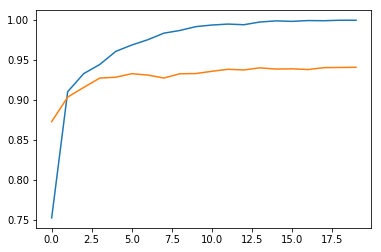

In [38]:
# !! Your code goes here







**c)** Create and train a convolutional neural network

**Hints:** Use a combination of the keras layers `Conv2D`, `MaxPooling2D` and  `Dropout`

In [46]:
# !! Your code goes here








_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
__________

In [47]:
# !! Your code goes here







Train on 5000 samples, validate on 10000 samples
Epoch 1/10
5000/5000 [==============================] - 35s 7ms/step - loss: 0.7524 - acc: 0.7624 - val_loss: 0.2280 - val_acc: 0.9328
Epoch 2/10
5000/5000 [==============================] - 42s 8ms/step - loss: 0.2561 - acc: 0.9236 - val_loss: 0.1634 - val_acc: 0.9484
Epoch 3/10
5000/5000 [==============================] - 34s 7ms/step - loss: 0.1609 - acc: 0.9528 - val_loss: 0.1038 - val_acc: 0.9673
Epoch 4/10
5000/5000 [==============================] - 39s 8ms/step - loss: 0.1200 - acc: 0.9638 - val_loss: 0.0936 - val_acc: 0.9700
Epoch 5/10
5000/5000 [==============================] - 38s 8ms/step - loss: 0.1010 - acc: 0.9726 - val_loss: 0.0978 - val_acc: 0.9685
Epoch 6/10
5000/5000 [==============================] - 38s 8ms/step - loss: 0.0840 - acc: 0.9736 - val_loss: 0.0899 - val_acc: 0.9717
Epoch 7/10
5000/5000 [==============================] - 38s 8ms/step - loss: 0.0676 - acc: 0.9786 - val_loss: 0.0897 - val_acc: 0.9711
Epoch 

**d)** Plot the accuracy on the training and validation sets and compare it to the results from the fully connected network.

(0.7, 1)

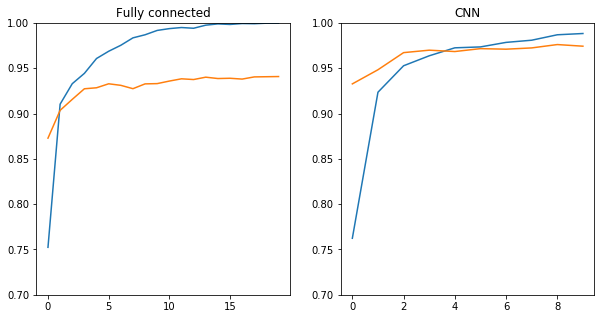

In [48]:
# !! Your code goes here





